In [1097]:
# Librerias a utilizar
from sklearn import datasets  # data a utilizar
import matplotlib.pyplot as plt  # graficar
from sklearn.linear_model import Perceptron as sklearn_Perceptron  # Perceptron
import numpy as np  # segmentar la data
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay  # Mostrar reporte de resultados
from sklearn.model_selection import train_test_split  # Segmentar la data
from sklearn.preprocessing import StandardScaler  # Estandarizar la data
from pandas import DataFrame #leer la data
import random #mezclar la data

# Leer, visualizar y filtrar la data

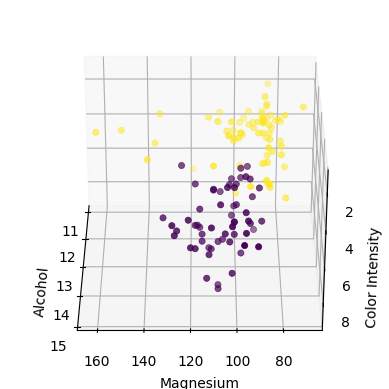

In [1098]:
# Cargar la data
wines = datasets.load_wine(as_frame=True)
data: DataFrame = wines.frame
# Filtrar características a estudiar
data = data.filter(["alcohol", "magnesium", "color_intensity", "target"])
# Filtrar solo 2 clases
data = data[data["target"] != 2]
_data = data
# Graficar
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter3D(
    data["alcohol"],
    data["magnesium"],
    data["color_intensity"],
    c=data["target"],
    cmap="viridis",
    linewidth=0.5,
)
ax.set(xlabel="Alcohol", ylabel="Magnesium", zlabel="Color Intensity")
ax.view_init(-150, 180)
plt.show()

# Segmentar la data (50% train, 50% test)

In [1099]:
data = data.sample(frac=1)
x_train, x_test, y_train, y_test = train_test_split(
    data[data.columns[:-1]], data[data.columns[-1]], test_size=0.5, shuffle=False
)
y_train = y_train.values
y_test = y_test.values

# Normalizar la data

In [1100]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

# Implementación propia del perceptrón

In [1101]:
class Perceptron:
    def __init__(self, activation_func, learning_rate=0.01, n_epoch=1000):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.weights = None
        self.b = None
        self.activation_func = activation_func

    def train(self, x, y):
        # Se obtiene el numero de muestras y categorias por muestra
        n_samples, n_features = x.shape
        # Se inicializa un peso por cada categoria
        self.weights = np.zeros(n_features)
        self.bias = 0  # Se inicializa b
        for _ in range(self.n_epoch):  # Repetir por el numero de epocas
            for i, xi in enumerate(x):  # Por cada muestra
                # Se calcula la suma ponderada
                # Producto punto entre las caracteristicas y los pesos + b
                sum_result = np.dot(xi, self.weights) + self.bias
                # Se aplica la funcion de activacion
                output = self.activation_func(sum_result)
                # Se actualizan los pesos y el bias
                update_term = self.learning_rate * (y[i] - output)
                self.weights += update_term * xi
                self.bias += update_term
            # Mezclar la data después de cada época
            aux_list = list(zip(x, y))
            random.shuffle(aux_list)
            x, y = zip(*aux_list)

    def predict(self, x):
        outputs = []
        for i, xi in enumerate(x):  # Por cada muestra
            # Se calcula la suma ponderada
            # Producto punto entre las caracteristicas y los pesos + b
            sum_result = np.dot(xi, self.weights) + self.bias
            # Se aplica la funcion de activacion
            output = self.activation_func(sum_result)
            # Se agrega el resultado a la lista de resultados
            outputs.append(output)
        return outputs

# Aplicación de la implementación propia

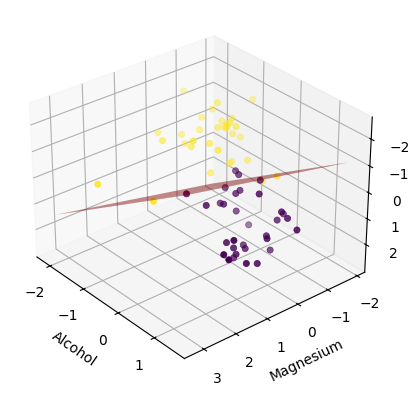

In [1102]:
def unit_step_func(x):  # funcion de activacion
    return 1 if x >= 0 else 0

perceptron = Perceptron(unit_step_func)
# Entrenar el modelo
perceptron.train(x_train, y_train)
# Predecir con la data de test
y_pred_own = perceptron.predict(x_test)

# graficar plano resultado con puntos de test
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
xx = np.linspace(np.min(x_test[:, 0]), np.max(x_test[:, 0]), 100)
yy = np.linspace(np.min(x_test[:, 1]), np.max(x_test[:, 1]), 100)
xx, yy = np.meshgrid(xx, yy)
z = (
    lambda x, y: (
        -perceptron.weights[0] * x - perceptron.weights[1] * y + perceptron.bias
    )
    / perceptron.weights[2]
)
zz = z(xx, yy)
ax.plot_surface(xx, yy, zz, alpha=0.5, color="red")
ax.scatter3D(
    x_test[:, 0],
    x_test[:, 1],
    x_test[:, 2],
    c=y_test,
    cmap="viridis",
    linewidth=0.5,
)
ax.set(xlabel="Alcohol", ylabel="Magnesium", zlabel="Color Intensity")
ax.view_init(-150, 220)
plt.show()

# Aplicación de la implementación de sklearn

In [1103]:
clf = sklearn_Perceptron(tol=1e-3, random_state=0)
# Entrenar modelo
clf.fit(x_train, y_train)
#Predecir con la data de test
y_pred_sklearn = clf.predict(x_test)

# Comparación de resultados

Reporte de implementación propia
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        32
           1       0.94      0.91      0.92        33

    accuracy                           0.92        65
   macro avg       0.92      0.92      0.92        65
weighted avg       0.92      0.92      0.92        65

Reporte de implementación sklearn
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.79      0.94      0.86        33

    accuracy                           0.85        65
   macro avg       0.86      0.84      0.84        65
weighted avg       0.86      0.85      0.84        65



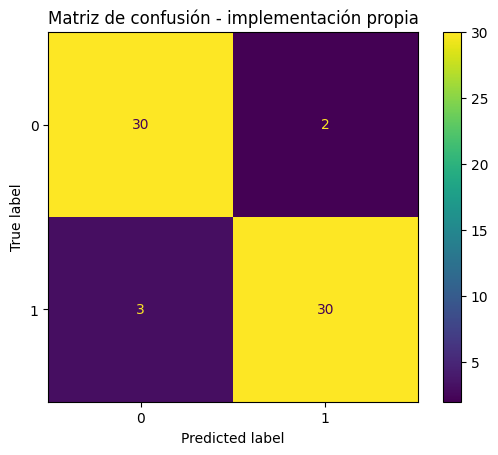

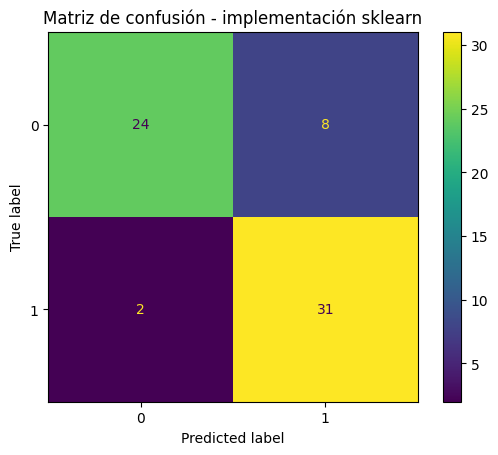

In [1104]:
print("Reporte de implementación propia")
print(classification_report(y_test, y_pred_own))
print("Reporte de implementación sklearn")
print(classification_report(y_test, y_pred_sklearn))

own_matrix = confusion_matrix(y_test, y_pred_own)
sklearn_matrix = confusion_matrix(y_test, y_pred_sklearn)

ownMatrixDisplay = ConfusionMatrixDisplay(
    confusion_matrix=own_matrix,
    display_labels=["0", "1"],
)
ownMatrixDisplay.plot()
plt.title("Matriz de confusión - implementación propia")
plt.show()
sklearnMatrixDisplay = ConfusionMatrixDisplay(
    confusion_matrix=sklearn_matrix, display_labels=["0", "1"]
)
sklearnMatrixDisplay.plot()
plt.title("Matriz de confusión - implementación sklearn")
plt.show()